Predicting Credit Scores for Loan Applicants

The objective of this case study is
to predict the creditworthiness of loan applicants and categorize them into 'Good' or
'Bad' credit classes. By doing so, the model will assist institutions in making informed
decisions about granting loans and minimizing potential losse

Importing the necessary libraries

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Loading the dataset

In [140]:
df = pd.read_excel("cdata.xlsx")

EDA

In [38]:
# Top 5 rows
df.head()

,Cbal,Cdur,Chist,Cpur,Camt,Sbal,Edur,InRate,MSG,Oparties,...,Prop,age,inPlans,Htype,NumCred,JobType,Ndepend,telephone,foreign,creditScore
0,0 <= Rs. < 2000,9,all settled till now,Business,13790,Rs. < 1000,1 to 4 years,2,married or widowed male,no one,...,real estate,27,bank,own,1,employee with official position,1,yes,no,good
1,0 <= Rs. < 2000,15,dues not paid earlier,electronics,15250,no savings account,more than 7 years,4,single male,"yes, guarantor",...,real estate,50,none,own,2,employee with official position,1,yes,no,good
2,0 <= Rs. < 2000,36,none taken/all settled,Business,19410,Rs. < 1000,more than 7 years,4,single male,no one,...,Unknown,61,none,free,1,"employed either in management, self or in high...",1,yes,no,bad
3,0 <= Rs. < 2000,48,none taken/all settled,Business,144090,Rs. < 1000,1 to 4 years,2,single male,no one,...,Other cars etc.,25,none,own,1,employee with official position,1,yes,no,bad
4,no checking account,24,all settled till now,electronics,31690,Rs. < 1000,less than 1 year,4,divorced or separated or married female,no one,...,life insurance/building society,26,none,own,1,employee with official position,1,yes,no,good


In [39]:
# Last 5 rows
df.tail()

,Cbal,Cdur,Chist,Cpur,Camt,Sbal,Edur,InRate,MSG,Oparties,...,Prop,age,inPlans,Htype,NumCred,JobType,Ndepend,telephone,foreign,creditScore
995,no checking account,6,all settled,second hand vehicle,7710,no savings account,1 to 4 years,1,single male,"yes, guarantor",...,real estate,26,stores,own,1,resident unskilled,2,no,no,good
996,0 <= Rs. < 2000,12,all settled till now,electronics,64560,no savings account,not employed,2,single male,no one,...,Unknown,52,none,own,1,"employed either in management, self or in high...",1,yes,no,bad
997,no checking account,36,dues not paid earlier,electronics,95540,Rs. < 1000,1 to 4 years,2,divorced or separated or married female,no one,...,Other cars etc.,31,stores,own,2,employee with official position,1,no,no,good
998,Rs. >=2000,18,all settled till now,second hand vehicle,19490,Rs. < 1000,more than 7 years,3,divorced or separated or married female,no one,...,Other cars etc.,23,none,own,1,"employed either in management, self or in high...",1,no,no,good
999,Rs. < 0,36,dues not paid earlier,furniture,62170,Rs. < 1000,less than 1 year,4,divorced or separated or married female,"yes, co-applicant",...,Unknown,23,none,pays rent,2,resident unskilled,1,yes,no,bad


In [40]:
# shape of the dataset
df.shape

(1000, 21)

In [41]:
# checking the datatype of every column
df.dtypes

Cbal           object
Cdur            int64
Chist          object
Cpur           object
Camt            int64
Sbal           object
Edur           object
InRate          int64
MSG            object
Oparties       object
Rdur           object
Prop           object
age             int64
inPlans        object
Htype          object
NumCred         int64
JobType        object
Ndepend         int64
telephone      object
foreign        object
creditScore    object
dtype: object

In [42]:
# info will give complete information like datatype, column index, class, non null count and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Cbal         1000 non-null   object
 1   Cdur         1000 non-null   int64 
 2   Chist        1000 non-null   object
 3   Cpur         1000 non-null   object
 4   Camt         1000 non-null   int64 
 5   Sbal         1000 non-null   object
 6   Edur         1000 non-null   object
 7   InRate       1000 non-null   int64 
 8   MSG          1000 non-null   object
 9   Oparties     1000 non-null   object
 10  Rdur         1000 non-null   object
 11  Prop         1000 non-null   object
 12  age          1000 non-null   int64 
 13  inPlans      1000 non-null   object
 14  Htype        1000 non-null   object
 15  NumCred      1000 non-null   int64 
 16  JobType      1000 non-null   object
 17  Ndepend      1000 non-null   int64 
 18  telephone    1000 non-null   object
 19  foreign      1000 non-null  

Installed pycaret

In [108]:
# !pip install pycaret

In [3]:
# Importing pycaret for classification task
from pycaret.classification import *

In [5]:
new1 = df

In [6]:
new1.dropna(subset = ['creditScore'], inplace=True)

In [7]:
s = setup(new1, target='creditScore', session_id=123)

,Description,Value
0,Session id,123
1,Target,creditScore
2,Target type,Binary
3,Target mapping,"bad: 0, good: 1"
4,Original data shape,"(1000, 21)"
5,Transformed data shape,"(1000, 62)"
6,Transformed train set shape,"(700, 62)"
7,Transformed test set shape,"(300, 62)"
8,Ordinal features,2
9,Numeric features,6


In [8]:
# Comparing different models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7486,0.7762,0.9184,0.7683,0.8364,0.3104,0.3382,0.7030
ridge,Ridge Classifier,0.7400,0.0000,0.8673,0.7844,0.8234,0.3341,0.3429,0.4780
gbc,Gradient Boosting Classifier,0.7371,0.7667,0.8755,0.7778,0.8231,0.3162,0.3293,0.6510
lda,Linear Discriminant Analysis,0.7371,0.7655,0.8510,0.7900,0.8189,0.3406,0.3460,0.4860
et,Extra Trees Classifier,0.7357,0.7602,0.8796,0.7749,0.8234,0.3048,0.3169,0.6650
ada,Ada Boost Classifier,0.7314,0.7420,0.8490,0.7851,0.8153,0.3242,0.3298,0.5470
nb,Naive Bayes,0.7171,0.7365,0.9163,0.7413,0.8192,0.1994,0.2296,0.4020
lr,Logistic Regression,0.7143,0.6643,0.9327,0.7333,0.8199,0.1656,0.2183,0.7000
dummy,Dummy Classifier,0.7000,0.5000,1.0000,0.7000,0.8235,0.0000,0.0000,0.2970
dt,Decision Tree Classifier,0.6814,0.6133,0.7837,0.7675,0.7739,0.2301,0.2340,0.3240


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [9]:
# Building Random Forest
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7571,0.8275,0.9796,0.7500,0.8496,0.2735,0.3563
1,0.7143,0.7789,0.9184,0.7377,0.8182,0.1870,0.2142
2,0.7000,0.7216,0.8776,0.7414,0.8037,0.1860,0.1985
3,0.8143,0.7813,0.9592,0.8103,0.8785,0.4961,0.5294
4,0.7429,0.7143,0.9184,0.7627,0.8333,0.2913,0.3169
5,0.7000,0.7692,0.8571,0.7500,0.8000,0.2105,0.2182
6,0.8000,0.7779,0.9388,0.8070,0.8679,0.4656,0.4890
7,0.7571,0.7940,0.8980,0.7857,0.8381,0.3609,0.3741
8,0.7571,0.8397,0.9388,0.7667,0.8440,0.3200,0.3563


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

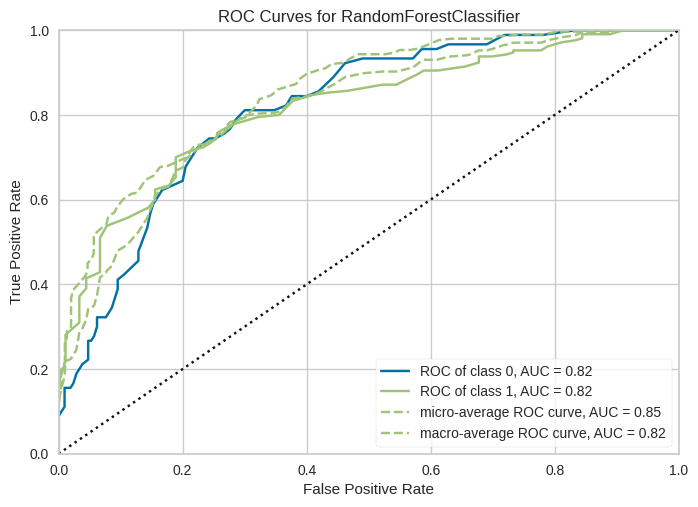

In [10]:
plot_model(rf)

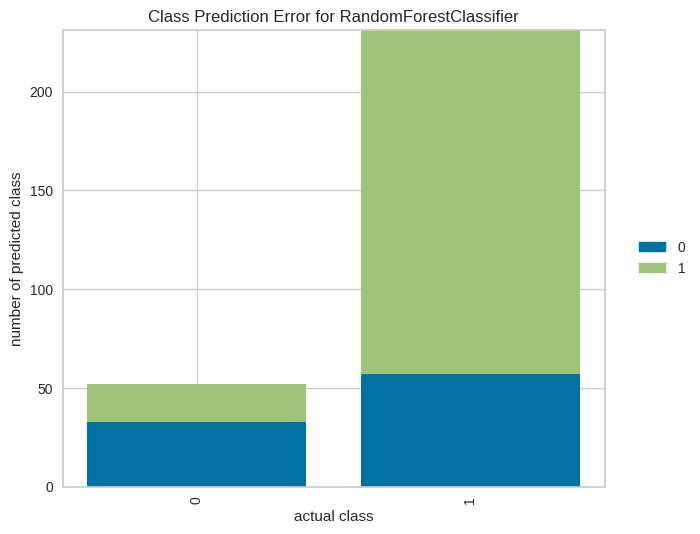

In [11]:
plot_model(rf, plot = 'error')

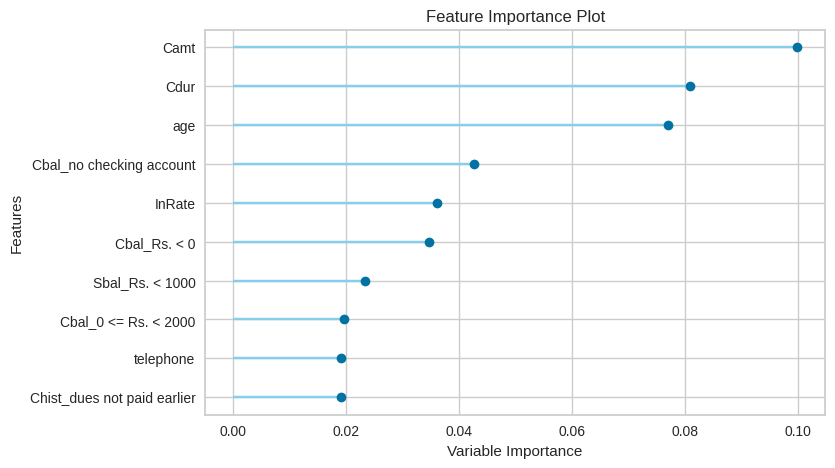

In [12]:
plot_model(rf, plot='feature')

In [43]:
# Droping the column which do not h so much importance in the predictive modelling of this dataset
df.drop(["MSG", "Rdur", "telephone"], axis = 1, inplace = True)

In [44]:
# value count for each columns
for col in df.columns:
  val = df[col].value_counts()
  print(f'{col} ----> {val}')


Cbal ----> no checking account    394
Rs. < 0                274
0 <= Rs. < 2000        269
Rs. >=2000              63
Name: Cbal, dtype: int64
Cdur ----> 24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
60     13
27     13
42     11
11      9
20      8
8       7
4       6
39      5
45      5
7       5
14      4
13      4
33      3
28      3
16      2
22      2
54      2
47      1
5       1
26      1
72      1
40      1
Name: Cdur, dtype: int64
Chist ----> all settled till now      618
dues not paid earlier     293
all settled                49
none taken/all settled     40
Name: Chist, dtype: int64
Cpur ----> electronics            280
second hand vehicle    234
furniture              181
new vehicle            103
Business                97
education               50
renovation              22
miscellaneous           12
domestic needs          12
retaining                9
Name: Cpur, dtype: int64
Camt ----> 12500    3
1466

In [45]:
# unique values in each columns
for col in df.columns:
  if df[col].dtypes == "object":
    val = df[col].unique()
  print(f'{col} ----> {val}')

Cbal ----> ['0 <= Rs. < 2000' 'no checking account' 'Rs. < 0' 'Rs. >=2000']
Cdur ----> ['0 <= Rs. < 2000' 'no checking account' 'Rs. < 0' 'Rs. >=2000']
Chist ----> ['all settled till now' 'dues not paid earlier' 'none taken/all settled'
 'all settled']
Cpur ----> ['Business' 'electronics' 'renovation' 'second hand vehicle' 'education'
 'new vehicle' 'miscellaneous' 'furniture' 'retaining' 'domestic needs']
Camt ----> ['Business' 'electronics' 'renovation' 'second hand vehicle' 'education'
 'new vehicle' 'miscellaneous' 'furniture' 'retaining' 'domestic needs']
Sbal ----> ['Rs. < 1000' 'no savings account' 'Rs. >= 10,000' '5000 <= Rs. < 10,000'
 '1000 <= Rs. < 5,000']
Edur ----> ['1 to 4 years' 'more than 7 years' 'less than 1 year' '4 to 7 years'
 'not employed']
InRate ----> ['1 to 4 years' 'more than 7 years' 'less than 1 year' '4 to 7 years'
 'not employed']
Oparties ----> ['no one' 'yes, guarantor' 'yes, co-applicant']
Prop ----> ['real estate' 'Unknown' 'Other cars etc.'
 'life in

In [46]:
# Checking For Null values and there is no null value in the dataset

In [47]:
df.isnull().sum().sum()

0

In [48]:
# No Duplicate value in the dataset

In [49]:
df.duplicated().sum()

0

**Outlier Detected**

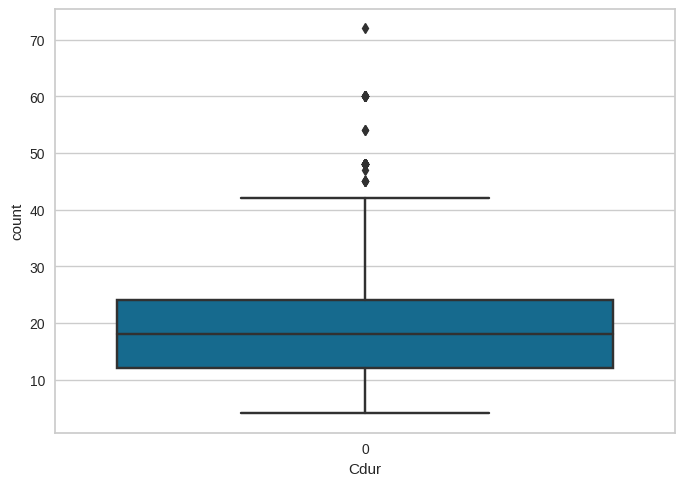

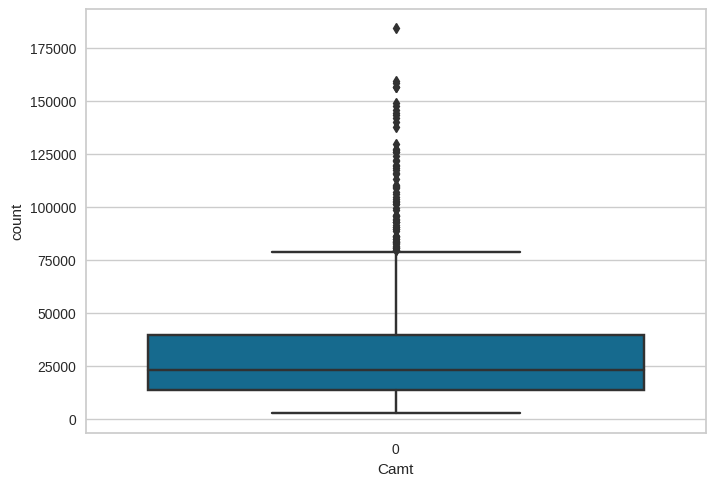

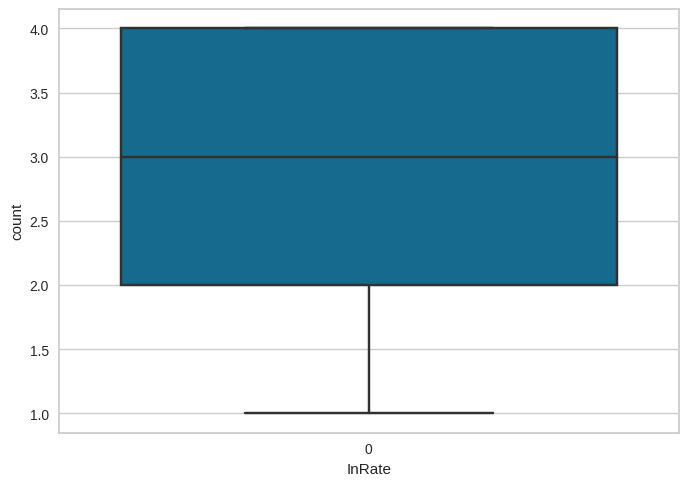

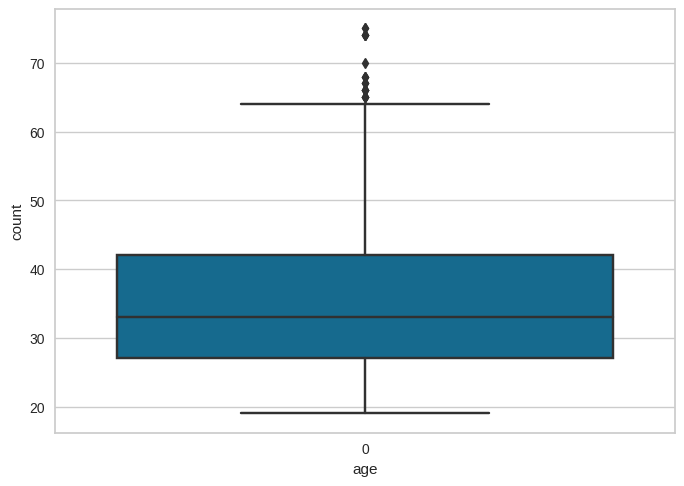

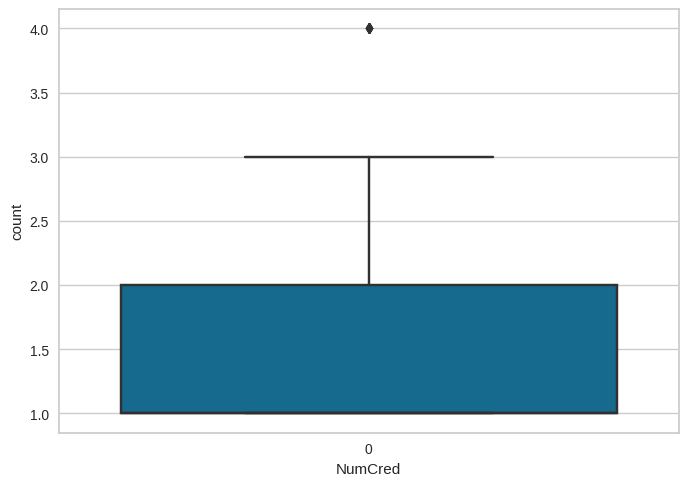

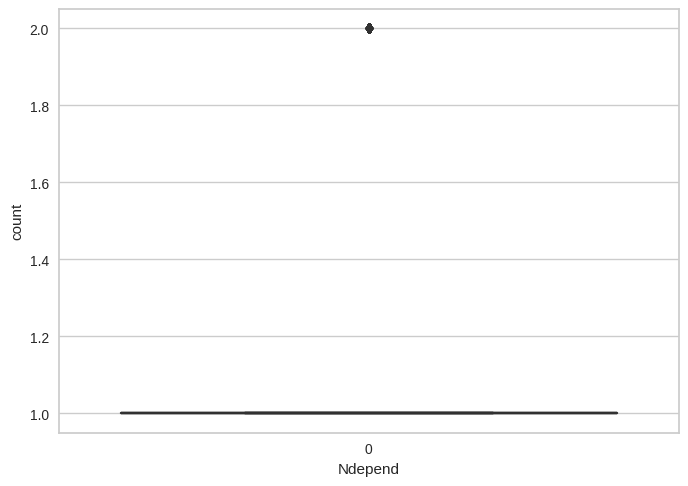

In [50]:
for col in df.columns:
  if (df[col].dtypes == "int" or df[col].dtypes == "float"):
    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()

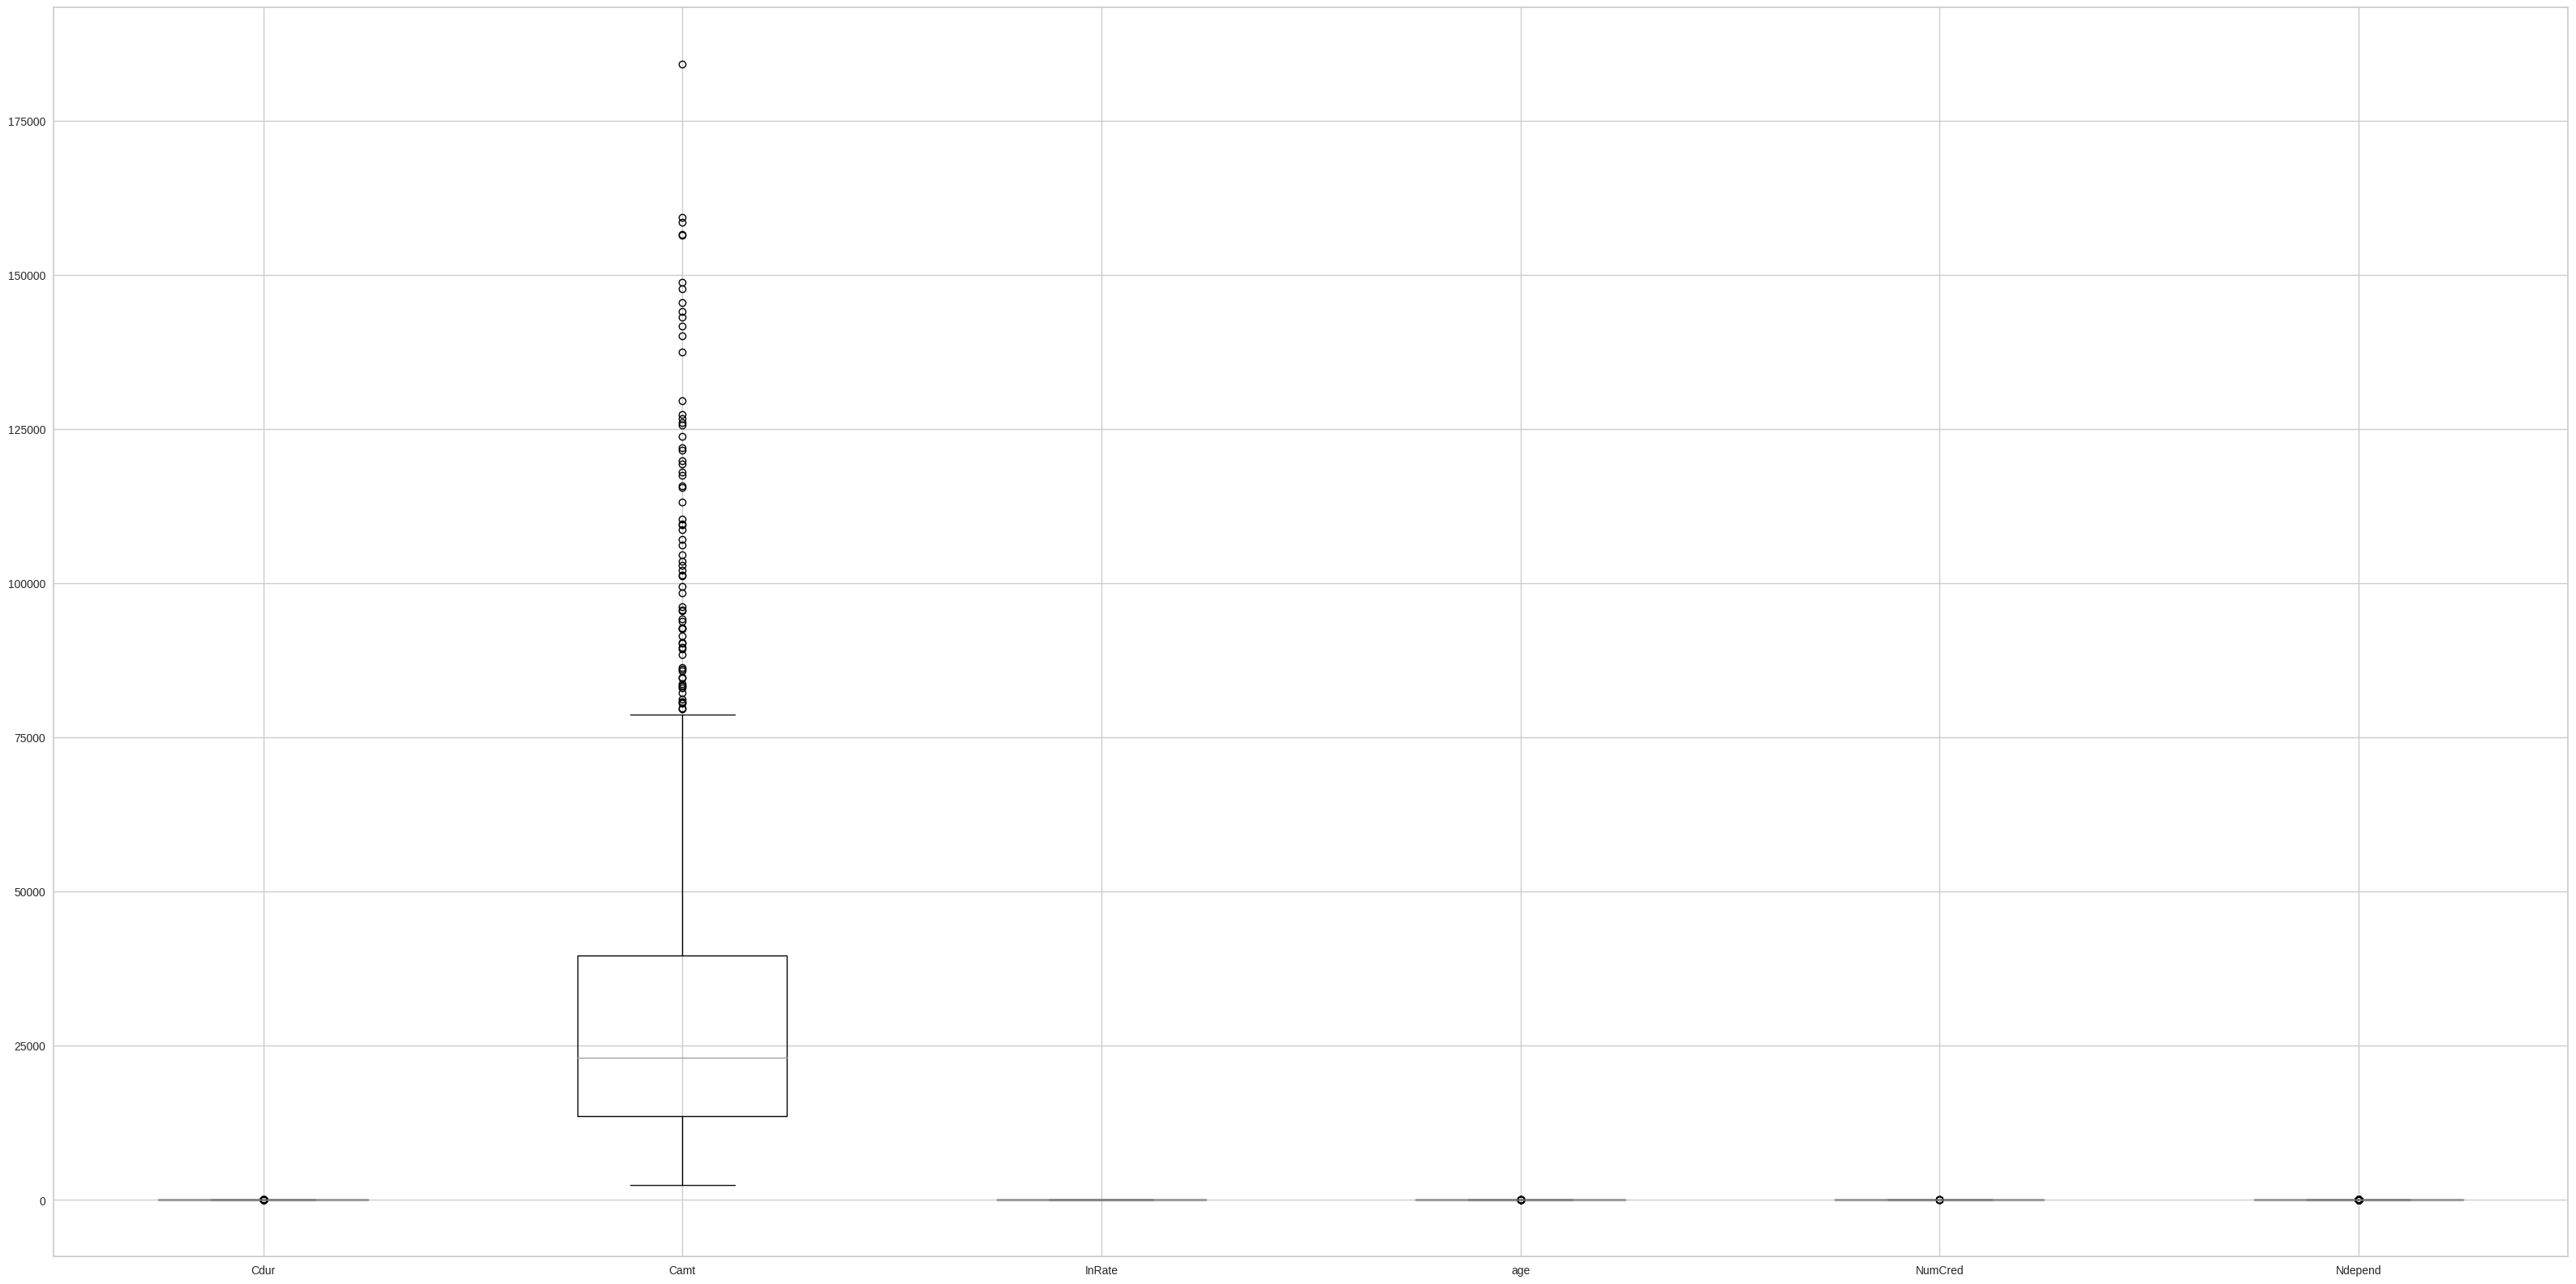

In [51]:
df.boxplot(figsize=(40,20))
plt.show()

In [52]:
# for col in df.columns:
#   if (df[col].dtypes == "int" or df[col].dtypes == "float"):
#     q1 = df[col].quantile(0.25)
#     q3 = df[col].quantile(0.75)
#     iqr = q3 - q1
#     upper_limit = q3 + 1.5 * iqr
#     lower_limit = q1 - 1.5 * iqr
#     df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]

In [53]:
# there are outliers in the datasset but we cant remove them due to loss of data
# if we romove them then there is 30% loss in the data

# so i'm transforming those columns which have outliers by log transformation

In [54]:
col = ["Camt", "Cdur", "age"]
for c in col:
  df[c]= np.log(df[c])

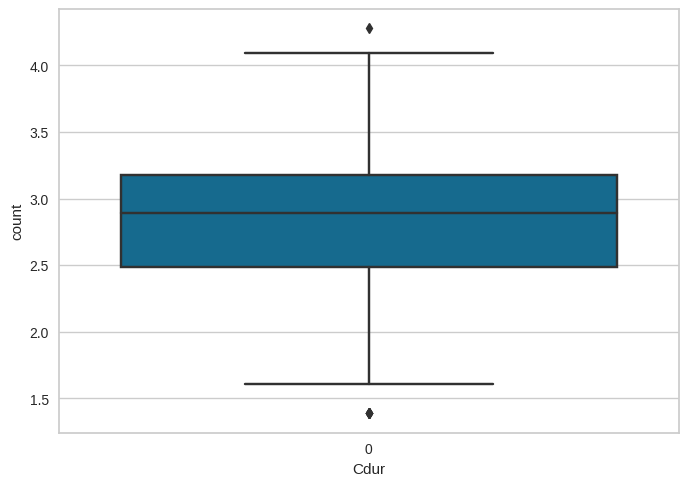

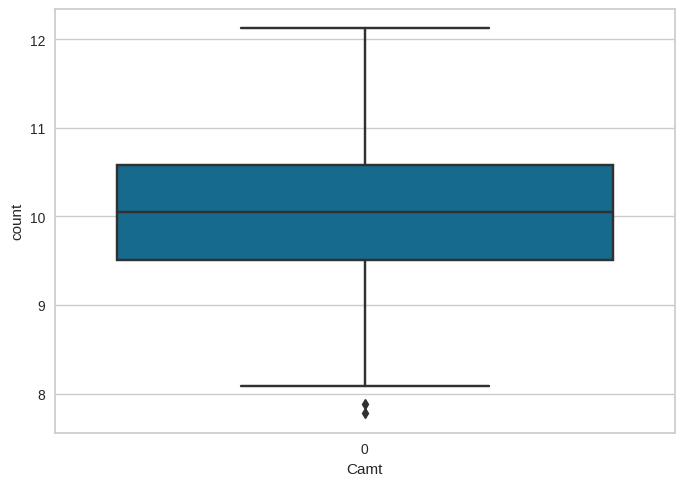

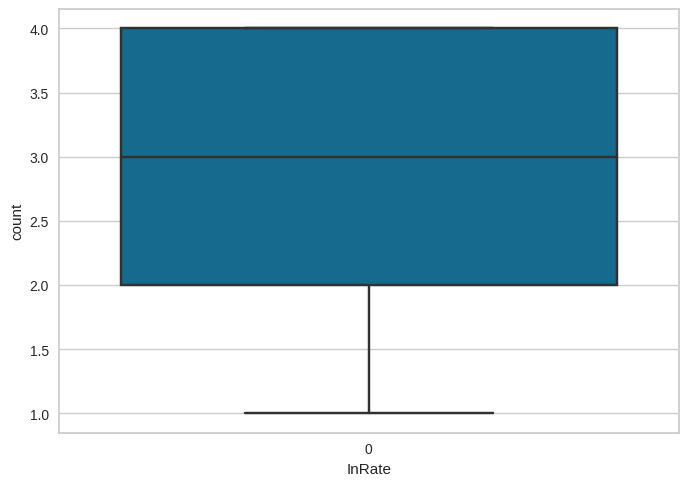

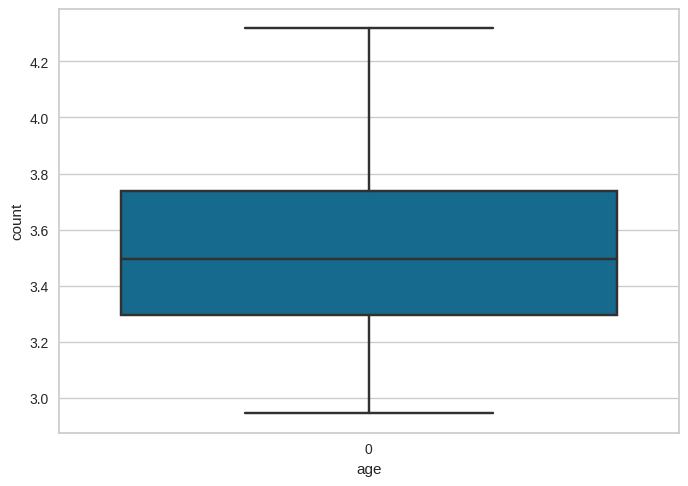

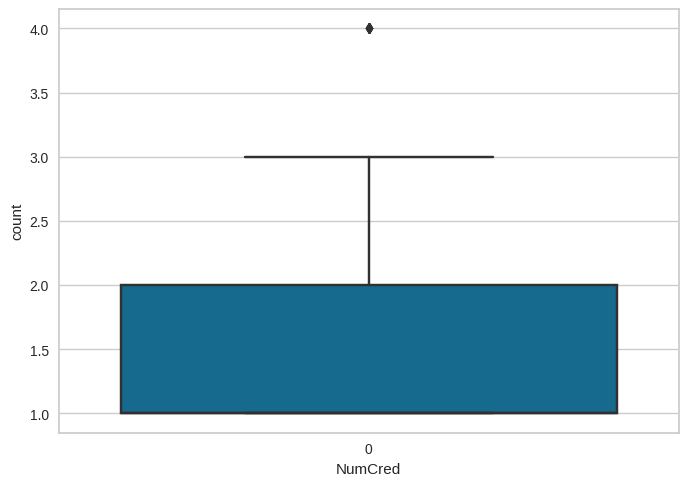

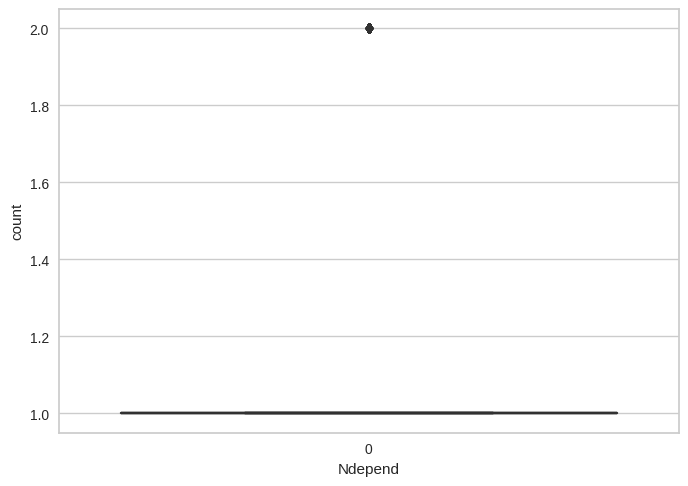

In [55]:
for col in df.columns:
  if (df[col].dtypes == "int" or df[col].dtypes == "float"):
    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()

In [56]:
df.shape

(1000, 18)

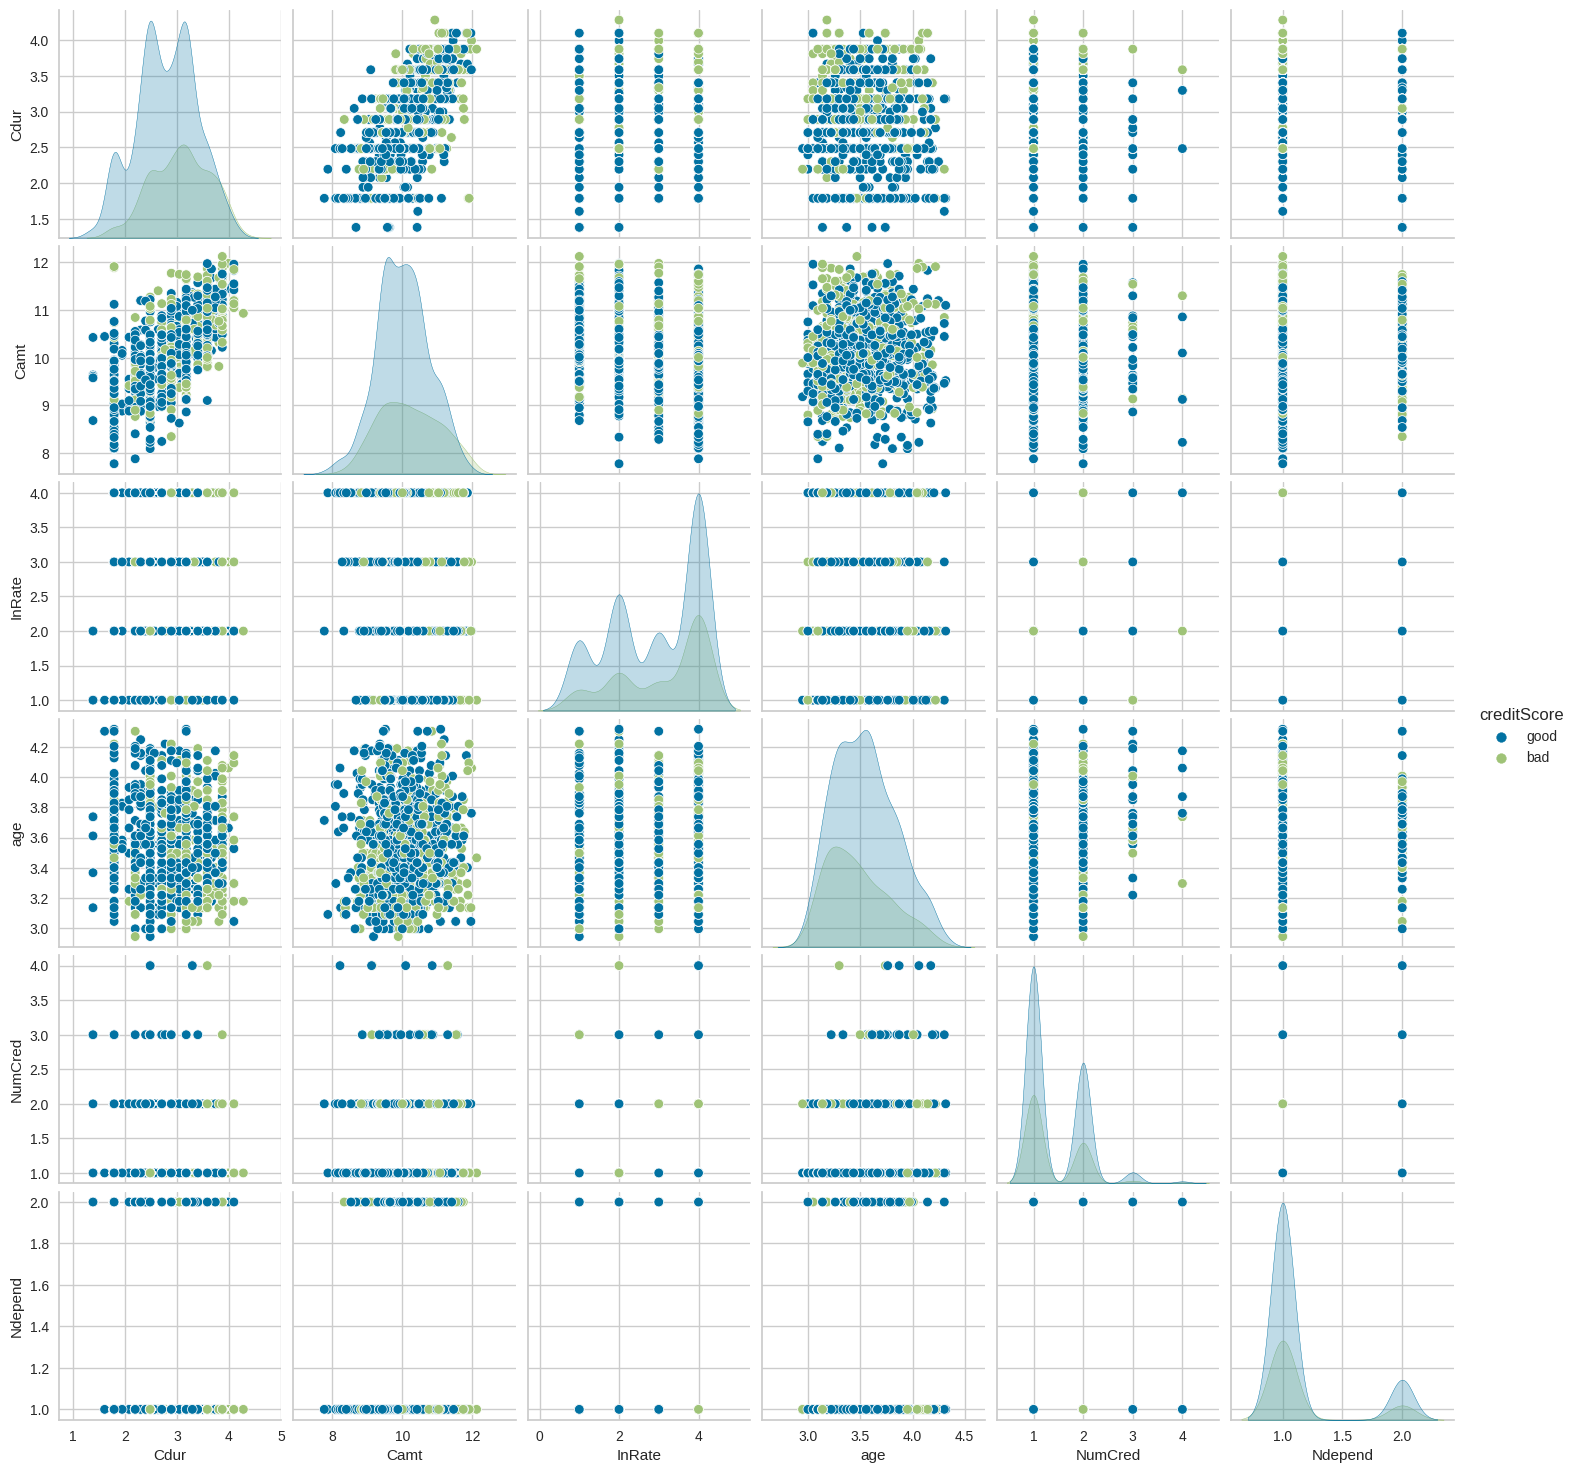

In [57]:
sns.pairplot(df,hue='creditScore')

In [58]:
df.dtypes

Cbal            object
Cdur           float64
Chist           object
Cpur            object
Camt           float64
Sbal            object
Edur            object
InRate           int64
Oparties        object
Prop            object
age            float64
inPlans         object
Htype           object
NumCred          int64
JobType         object
Ndepend          int64
foreign         object
creditScore     object
dtype: object

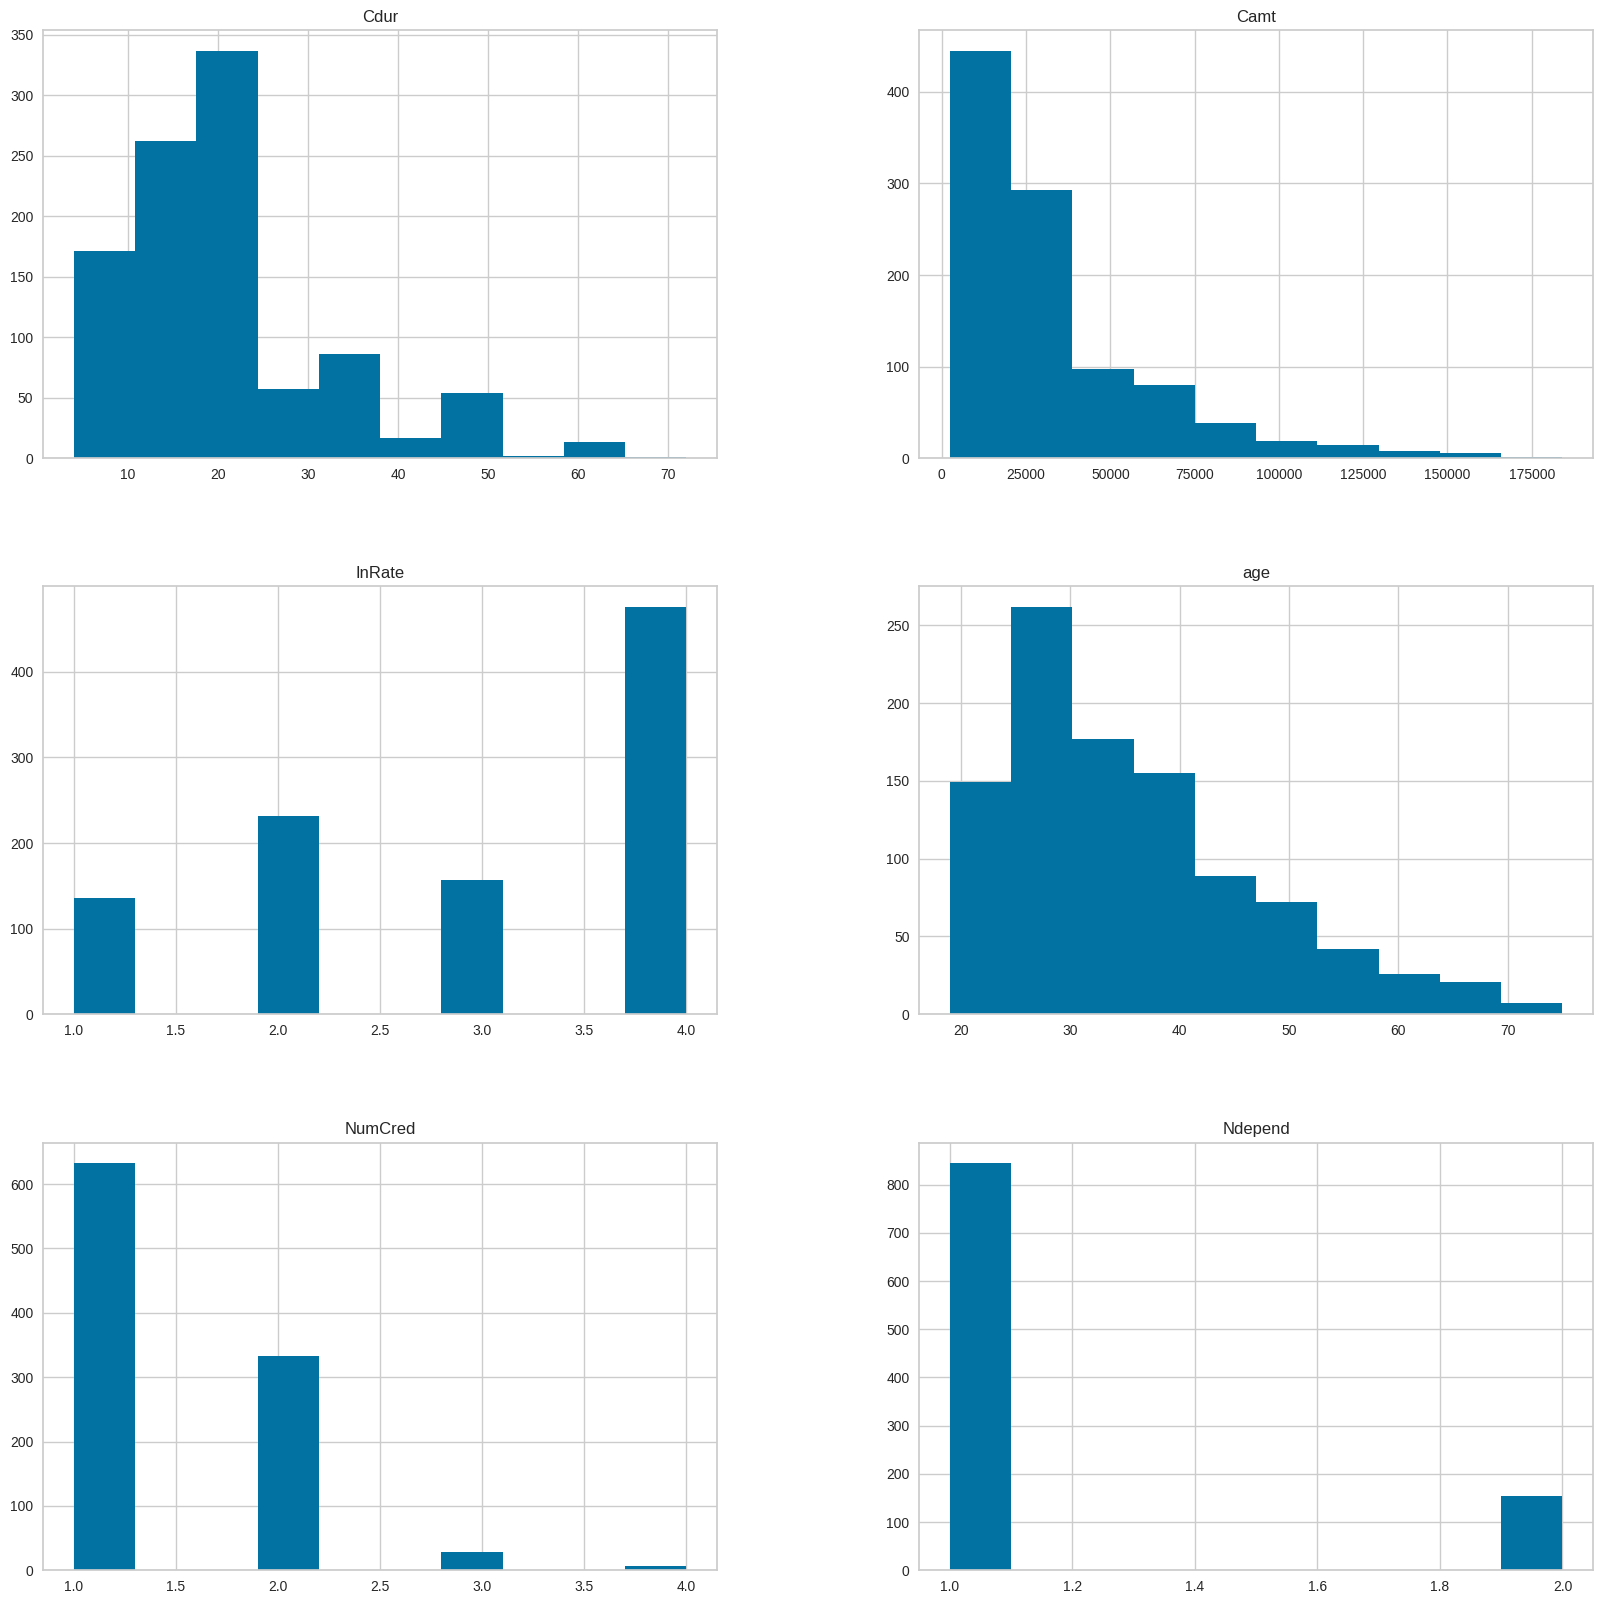

In [143]:
df.hist(figsize=(20, 20))
plt.show()

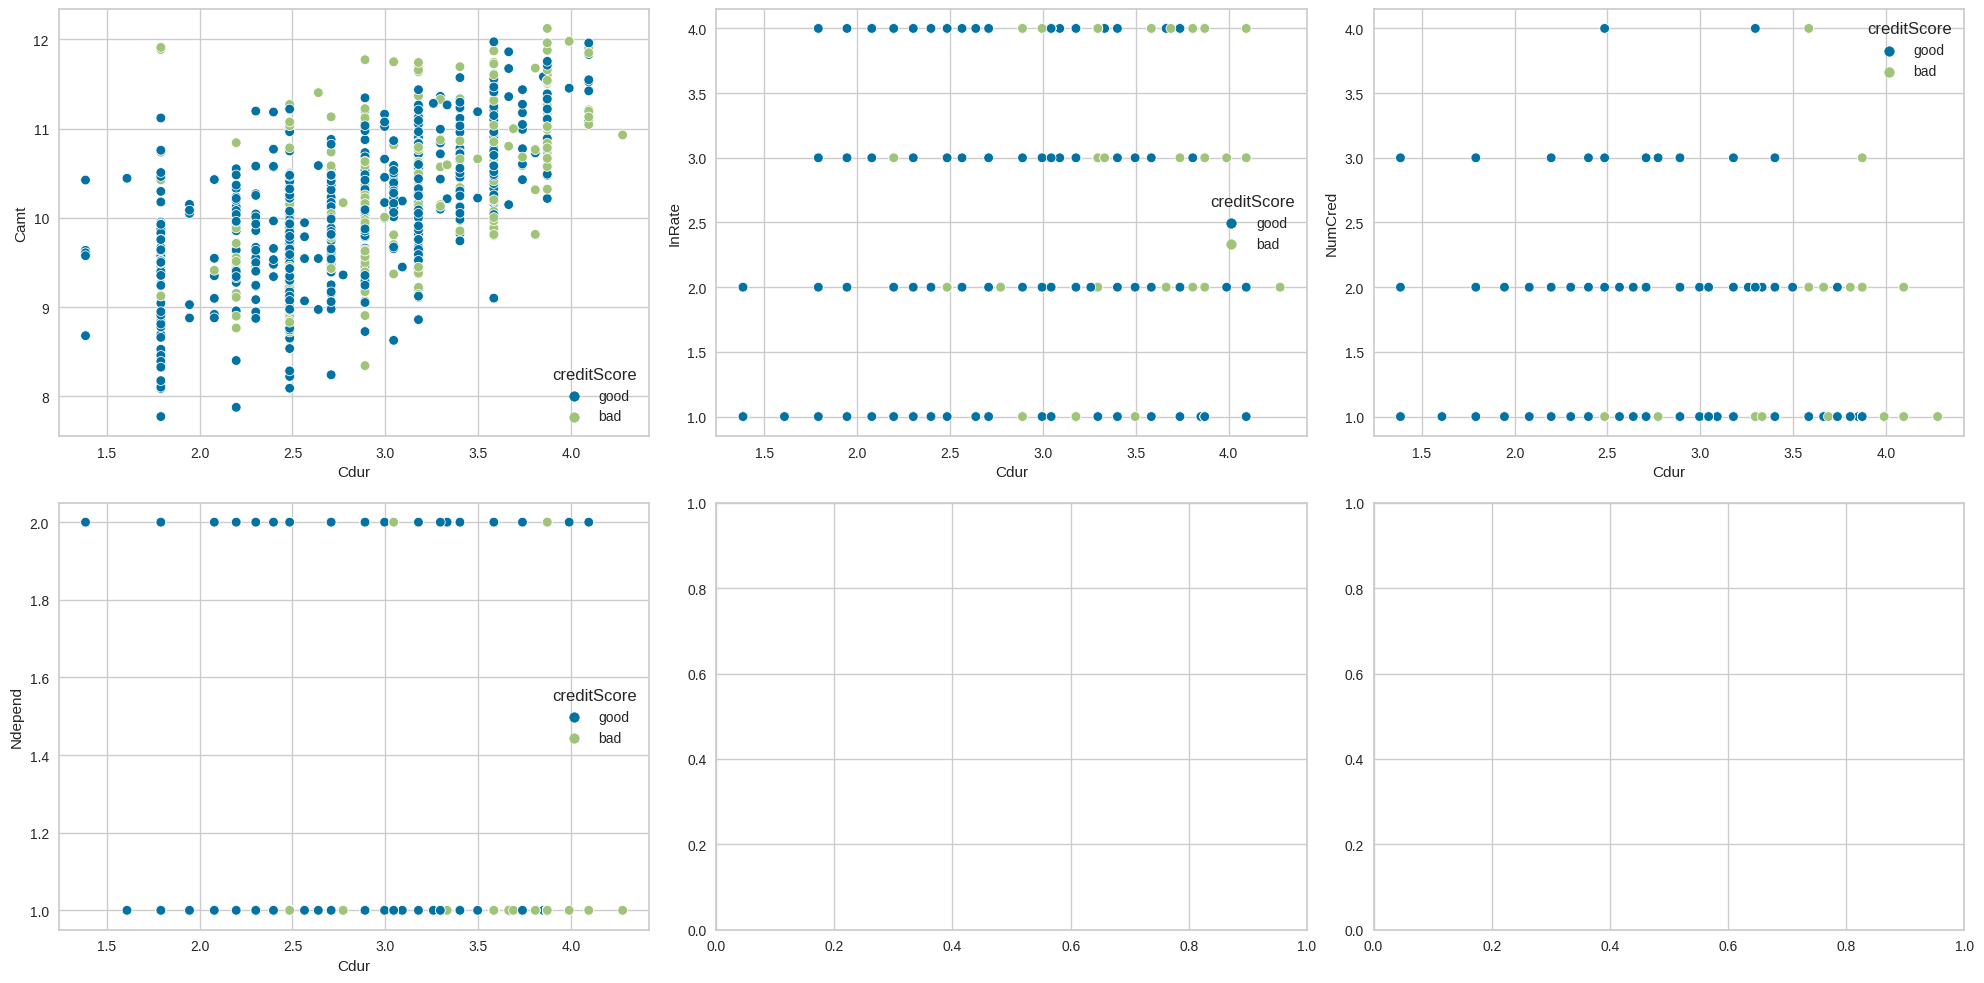

In [59]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

sns.scatterplot(x='Cdur', y='Camt', hue='creditScore', data=df, ax=axes[0, 0])
axes[0, 0].set_xlabel('Cdur')
axes[0, 0].set_ylabel('Camt')

sns.scatterplot(x='Cdur', y='InRate', hue='creditScore', data=df, ax=axes[0, 1])
axes[0, 1].set_xlabel('Cdur')
axes[0, 1].set_ylabel('InRate')

sns.scatterplot(x='Cdur', y='NumCred', hue='creditScore', data=df, ax=axes[0, 2])
axes[0, 2].set_xlabel('Cdur')
axes[0, 2].set_ylabel('NumCred')

sns.scatterplot(x='Cdur', y='Ndepend', hue='creditScore', data=df, ax=axes[1, 0])
axes[1, 0].set_xlabel('Cdur')
axes[1, 0].set_ylabel('Ndepend')

plt.tight_layout()
plt.show()

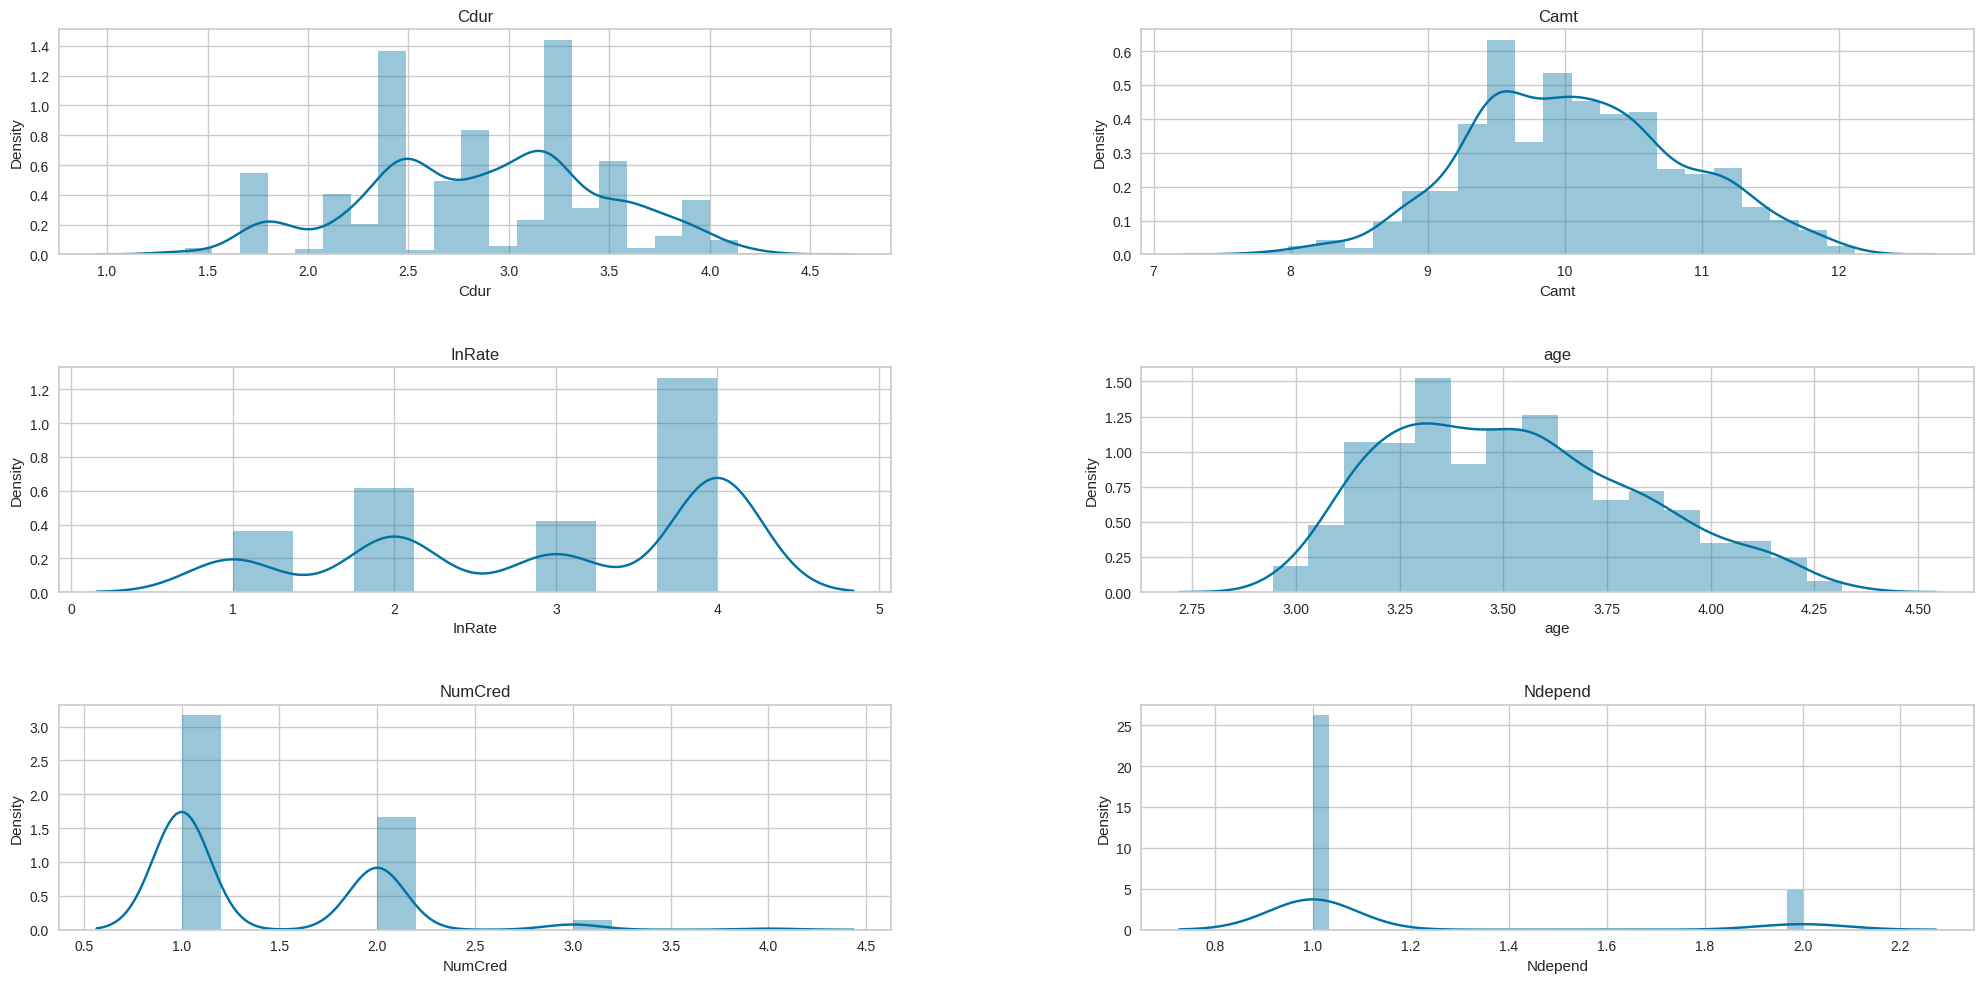

In [60]:
col = df.select_dtypes(include=['float64', 'int64']).columns

fig, axes = plt.subplots(3, 2, figsize=(20, 10))

axes = axes.flatten()

for i, column in enumerate(col):
    sns.distplot(df[column], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

In [61]:
# for getting the descriptive analysis of all numerical variable

In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cdur,1000.0,2.877018,0.582240,1.386294,2.484907,2.890372,3.178054,4.276666
Camt,1000.0,10.084606,0.781331,7.774856,9.513034,10.046505,10.586648,12.123343
InRate,1000.0,2.973000,1.118715,1.000000,2.000000,3.000000,4.000000,4.000000
age,1000.0,3.524306,0.299747,2.944439,3.295837,3.496508,3.737670,4.317488
NumCred,1000.0,1.407000,0.577654,1.000000,1.000000,1.000000,2.000000,4.000000
Ndepend,1000.0,1.155000,0.362086,1.000000,1.000000,1.000000,1.000000,2.000000


<Axes: >

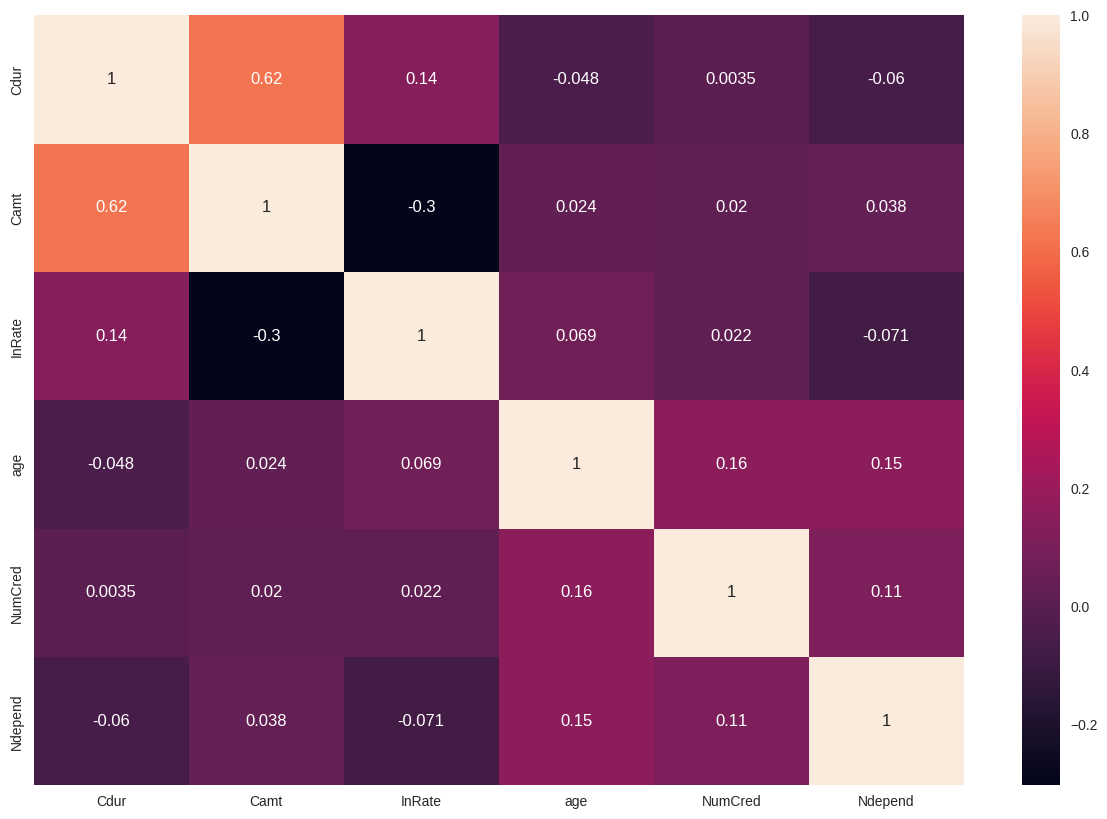

In [63]:
corr = df.corr(method='pearson')
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)

In [64]:
df.dtypes

Cbal            object
Cdur           float64
Chist           object
Cpur            object
Camt           float64
Sbal            object
Edur            object
InRate           int64
Oparties        object
Prop            object
age            float64
inPlans         object
Htype           object
NumCred          int64
JobType         object
Ndepend          int64
foreign         object
creditScore     object
dtype: object

In [65]:
# Define the mappings for each column means encoding them
column_mappings = column_mappings = {
    'Cbal': {'0 <= Rs. < 2000': 0, 'no checking account': 1, 'Rs. < 0': 2, 'Rs. >=2000': 3},
    'Chist': {'all settled till now': 0, 'dues not paid earlier': 1, 'none taken/all settled': 2, 'all settled': 3},
    'Cpur': {'Business': 0, 'electronics': 1, 'renovation': 2, 'second hand vehicle': 3, 'education': 4,
             'new vehicle': 5, 'miscellaneous': 6, 'furniture': 7, 'retaining': 8, 'domestic needs': 9},
    'Sbal': {'Rs. < 1000': 0, 'no savings account': 1, 'Rs. >= 10,000': 2, '5000 <= Rs. < 10,000': 3,
             '1000 <= Rs. < 5,000': 4},
    'Edur': {'1 to 4 years': 0, 'more than 7 years': 1, 'less than 1 year': 2, '4 to 7 years': 3, 'not employed': 4},
    'Oparties': {'no one': 0, 'yes, guarantor': 1, 'yes, co-applicant': 2},
    'Prop': {'real estate': 0, 'Unknown': 1, 'Other cars etc.': 2, 'life insurance/building society': 3},
    'inPlans': {'bank': 0, 'none': 1, 'stores': 2},
    'Htype': {'own': 0, 'free': 1, 'pays rent': 2},
    'JobType': {'employee with official position': 0,
                'employed either in management, self or in high position': 1,
                'resident unskilled': 2, 'non resident either unemployed or unskilled': 3},
    'foreign': {'no': 0, 'yes': 1},
    'creditScore': {'good': 0, 'bad': 1}
}

for column, mapping in column_mappings.items():
    df[column] = df[column].map(mapping)

print(df.head())

   Cbal      Cdur  Chist  Cpur       Camt  Sbal  Edur  InRate  Oparties  Prop  \
0     0  2.197225      0     0   9.531699     0     0       2         0     0   
1     0  2.708050      1     1   9.632335     1     1       4         1     0   
2     0  3.583519      2     0   9.873544     0     1       4         0     1   
3     0  3.871201      2     0  11.878193     0     0       2         0     2   
4     1  3.178054      0     1  10.363756     0     2       4         0     3   

        age  inPlans  Htype  NumCred  JobType  Ndepend  foreign  creditScore  
0  3.295837        0      0        1        0        1        0            0  
1  3.912023        1      0        2        0        1        0            0  
2  4.110874        1      1        1        1        1        0            1  
3  3.218876        1      0        1        0        1        0            1  
4  3.258097        1      0        1        0        1        0            0  


In [66]:
df.head()

,Cbal,Cdur,Chist,Cpur,Camt,Sbal,Edur,InRate,Oparties,Prop,age,inPlans,Htype,NumCred,JobType,Ndepend,foreign,creditScore
0,0,2.197225,0,0,9.531699,0,0,2,0,0,3.295837,0,0,1,0,1,0,0
1,0,2.708050,1,1,9.632335,1,1,4,1,0,3.912023,1,0,2,0,1,0,0
2,0,3.583519,2,0,9.873544,0,1,4,0,1,4.110874,1,1,1,1,1,0,1
3,0,3.871201,2,0,11.878193,0,0,2,0,2,3.218876,1,0,1,0,1,0,1
4,1,3.178054,0,1,10.363756,0,2,4,0,3,3.258097,1,0,1,0,1,0,0


In [67]:
df.dtypes

Cbal             int64
Cdur           float64
Chist            int64
Cpur             int64
Camt           float64
Sbal             int64
Edur             int64
InRate           int64
Oparties         int64
Prop             int64
age            float64
inPlans          int64
Htype            int64
NumCred          int64
JobType          int64
Ndepend          int64
foreign          int64
creditScore      int64
dtype: object

<Axes: ylabel='creditScore'>

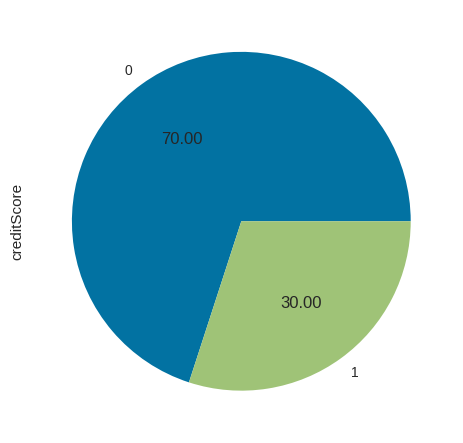

In [68]:
df['creditScore'].value_counts().plot(kind='pie', autopct='%.2f')

In [ ]:
# splitting the dataset into independent and dependent variable

In [69]:
X = df.drop(['creditScore'], axis=1)
y = df['creditScore']

In [70]:
# train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [71]:
# data is imbalanced so using smote
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

Scaling the dataset




In [73]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

Feature extraction with LDA

In [74]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)
lda.transform(x_test)

array([[-6.64004282e-01],
       [-2.28701816e-01],
       [-3.43033342e-01],
       [-1.38163534e+00],
       [-9.66521684e-01],
       [-2.68704691e+00],
       [-1.47835466e+00],
       [ 2.90841023e-01],
       [ 5.78175270e-01],
       [-1.12300928e+00],
       [-3.56668011e+00],
       [-3.59379117e-01],
       [-2.88322576e+00],
       [-3.34461269e-01],
       [ 2.02369647e+00],
       [-2.30560801e-01],
       [ 3.35863330e-01],
       [-3.76904555e+00],
       [-8.23315765e-02],
       [-2.77427967e+00],
       [ 3.94502966e-01],
       [-3.72701518e+00],
       [ 1.69109717e-01],
       [-5.14986027e-01],
       [-1.98183473e+00],
       [ 1.37527455e+00],
       [-3.31784595e-01],
       [ 2.85974058e-01],
       [-1.61817264e-01],
       [ 1.53093132e+00],
       [-1.06565448e+00],
       [-4.13027653e-01],
       [-2.99863828e-01],
       [-5.81938096e-01],
       [-2.32653828e+00],
       [-7.40594114e-01],
       [-7.06467640e-01],
       [-7.43800572e-01],
       [-7.9

In [75]:
lda_coefficients=np.exp(np.abs(lda.coef_))
lda_coefficients= lda_coefficients.flatten()
lda_coefficients

array([1.0271791 , 1.90354812, 1.12028203, 1.0605487 , 1.17239881,
       1.2958126 , 1.1530702 , 1.13311673, 1.08116333, 1.00867361,
       1.18104376, 1.43860685, 1.21509824, 1.38032228, 1.09011053,
       1.08342923, 1.23525347])

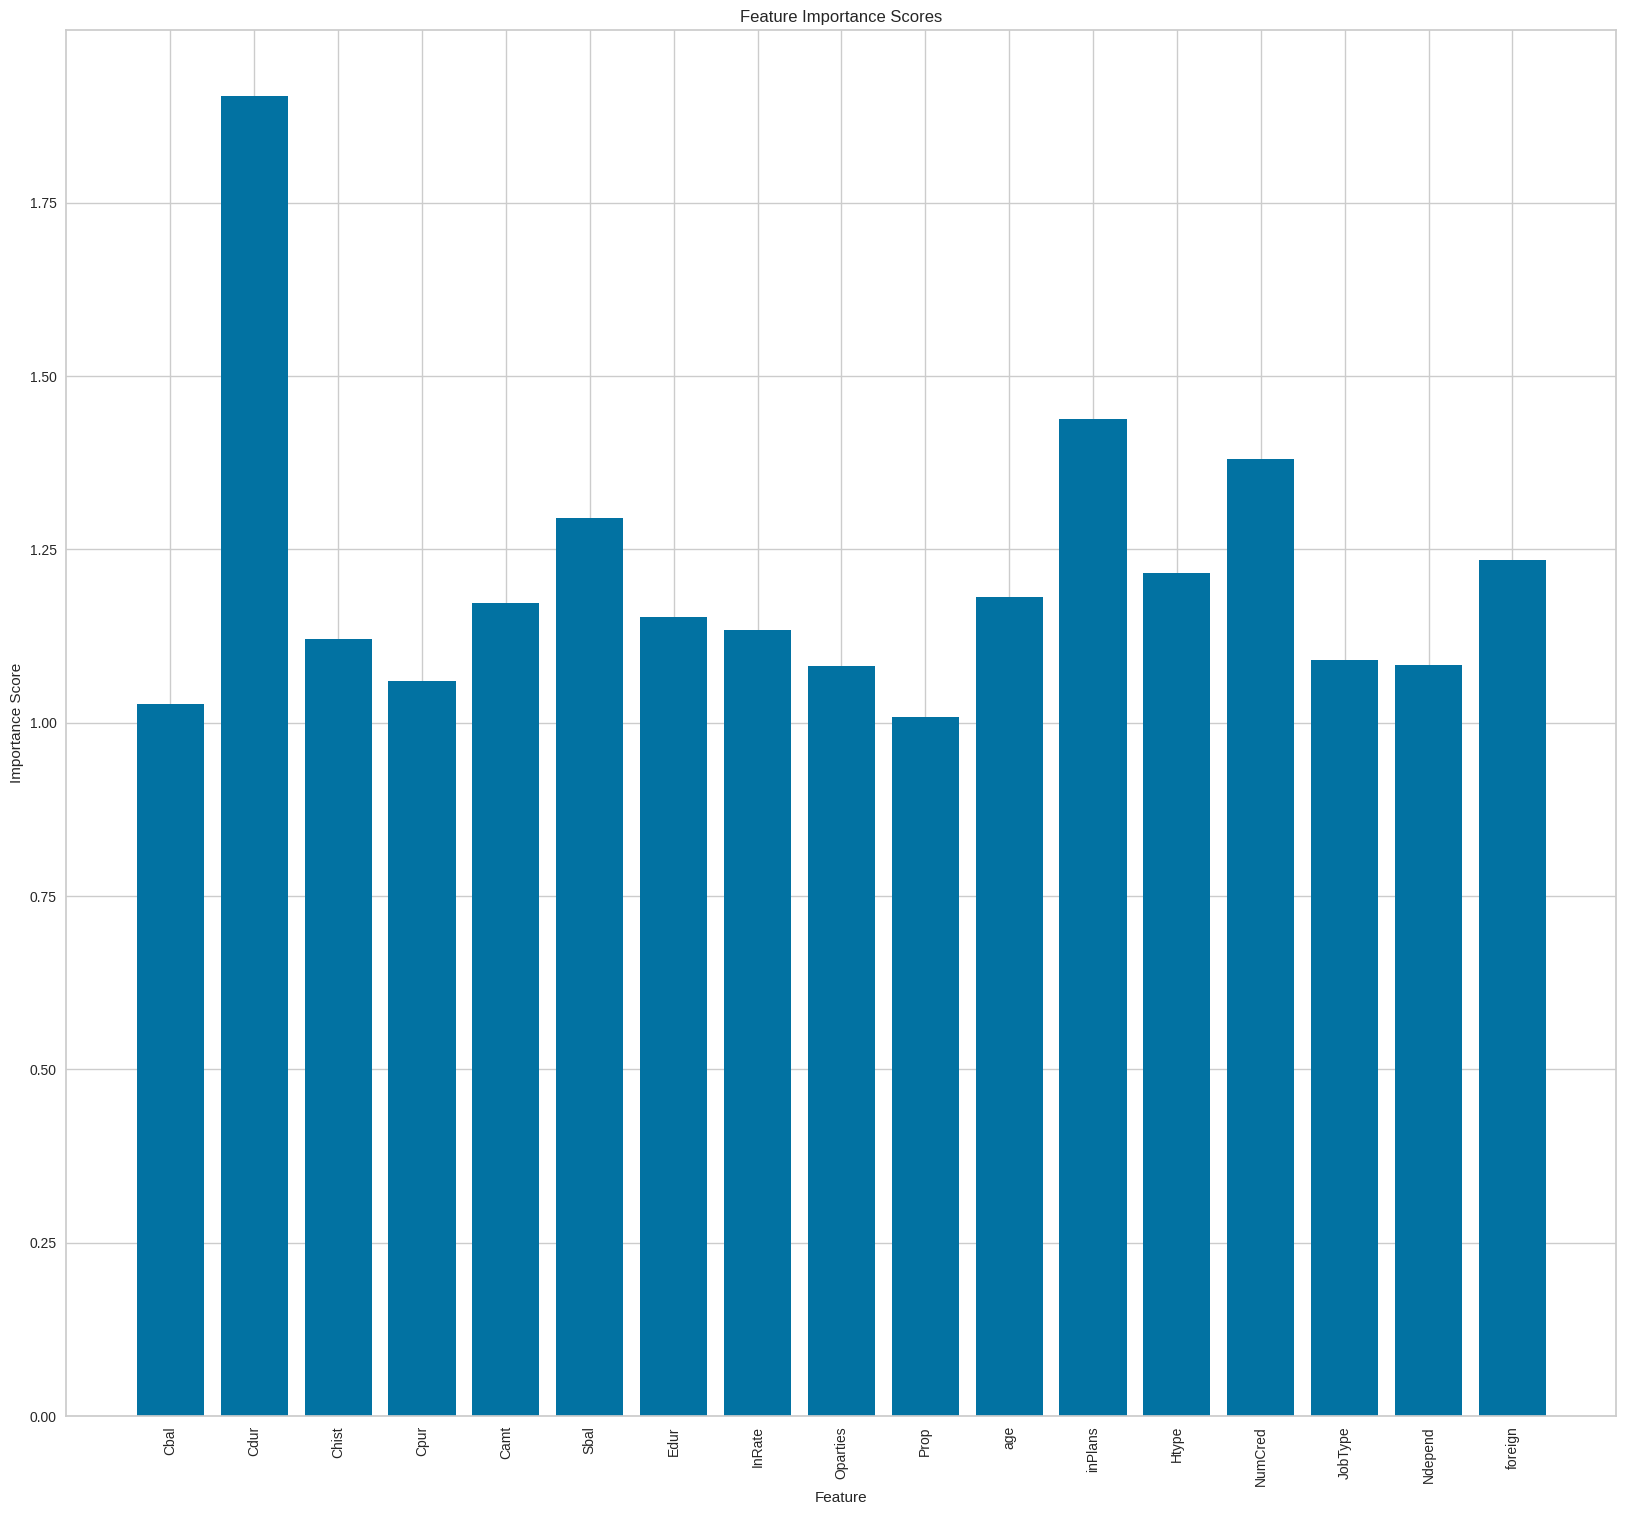

In [76]:
num_features=X.shape[1]
num_features
feature_indices=np.arange(num_features)
feature_names=list(X.columns)
plt.figure(figsize=(20,18))
plt.bar(feature_indices,lda_coefficients)
plt.xticks(feature_indices,feature_names,rotation="vertical")
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores')
plt.show()

In [79]:
df_feature_score=pd.DataFrame({"Feature_names":feature_names,"feature_scores":lda_coefficients})
top_12_values=df_feature_score.nlargest(12,'feature_scores')
top_12_values.head(12)

,Feature_names,feature_scores
1,Cdur,1.903548
11,inPlans,1.438607
13,NumCred,1.380322
5,Sbal,1.295813
16,foreign,1.235253
12,Htype,1.215098
10,age,1.181044
4,Camt,1.172399
6,Edur,1.153070
7,InRate,1.133117


In [80]:
top_12_values.index

Int64Index([1, 11, 13, 5, 16, 12, 10, 4, 6, 7, 2, 14], dtype='int64')

In [81]:
x_train=x_train[:,[1, 11, 13, 5, 16, 12, 10, 4, 6, 7, 2, 14]]

In [82]:
x_test=x_test[:,[1, 11, 13, 5, 16, 12, 10, 4, 6, 7, 2, 14]]

In [ ]:
# Model--> 1 LogisticRegression

In [83]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression()
log_reg_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
y_test_pred=log_reg_model.predict(x_test)
y_test_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0])

In [85]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.confusion_matrix(y_test, y_test_pred))
print(metrics.classification_report(y_test,y_test_pred))

0.65
[[103  41]
 [ 29  27]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       144
           1       0.40      0.48      0.44        56

    accuracy                           0.65       200
   macro avg       0.59      0.60      0.59       200
weighted avg       0.67      0.65      0.66       200



In [86]:
proba_valid = pd.DataFrame(log_reg_model.predict_proba(x_test))
proba_valid

,0,1
0,0.619726,0.380274
1,0.563545,0.436455
2,0.528398,0.471602
3,0.780533,0.219467
4,0.696087,0.303913
...,...,...
195,0.368178,0.631822
196,0.181633,0.818367
197,0.933469,0.066531
198,0.726967,0.273033


In [ ]:
# Model---> 2 DecisionTreeClassifier

In [87]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

In [88]:
dt_pred = dt_model.predict(x_test)
dt_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0])

In [89]:
from sklearn.metrics import *
accuracy_score(dt_pred,y_test)

0.685

In [90]:
confusion_matrix(dt_pred,y_test)

array([[99, 18],
       [45, 38]])

In [91]:
parameter_values = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
df1 = pd.DataFrame(columns=["max_depth","accuracy"])

In [92]:
df1

,max_depth,accuracy


In [93]:
for X in parameter_values:
    model = DecisionTreeClassifier(max_depth=X)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test,y_pred)*100
    df1= df1.append({'max_depth' : X , 'accuracy' : acc_score}, ignore_index=True)
df1

,max_depth,accuracy
0,1.0,51.0
1,2.0,63.0
2,3.0,60.5
3,4.0,65.5
4,5.0,66.0
5,6.0,64.5
6,7.0,67.5
7,8.0,69.0
8,9.0,71.0
9,10.0,68.5


In [95]:
final_model = DecisionTreeClassifier(max_depth=4)
final_model.fit(x_train, y_train)
y_pred = final_model.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)*100
acc_score

65.5

[Text(0.4732142857142857, 0.9, 'x[0] <= -0.835\ngini = 0.5\nsamples = 1112\nvalue = [556, 556]'),
 Text(0.23214285714285715, 0.7, 'x[10] <= 1.253\ngini = 0.406\nsamples = 307\nvalue = [220, 87]'),
 Text(0.14285714285714285, 0.5, 'x[0] <= -1.47\ngini = 0.368\nsamples = 280\nvalue = [212, 68]'),
 Text(0.07142857142857142, 0.3, 'x[7] <= 1.522\ngini = 0.086\nsamples = 67\nvalue = [64, 3]'),
 Text(0.03571428571428571, 0.1, 'gini = 0.03\nsamples = 65\nvalue = [64, 1]'),
 Text(0.10714285714285714, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.21428571428571427, 0.3, 'x[6] <= -0.373\ngini = 0.424\nsamples = 213\nvalue = [148, 65]'),
 Text(0.17857142857142858, 0.1, 'gini = 0.492\nsamples = 89\nvalue = [50, 39]'),
 Text(0.25, 0.1, 'gini = 0.331\nsamples = 124\nvalue = [98, 26]'),
 Text(0.32142857142857145, 0.5, 'x[7] <= -2.328\ngini = 0.417\nsamples = 27\nvalue = [8, 19]'),
 Text(0.2857142857142857, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.35714285714285715, 0.3, 'x[8]

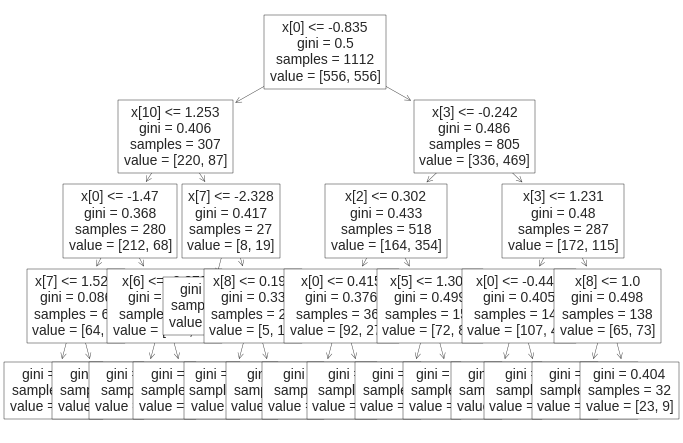

In [96]:
from sklearn import tree
tree.plot_tree(final_model,fontsize=10)

In [ ]:
# Model--->3 RandomForestClassifier

In [97]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [98]:
rf_predictions = random_forest.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_accuracy

0.705

In [99]:
li = [50,100,200,300,400,500,600,700,800,900,1000]
accuracy_li = []

for i in li:

    Rd_model = RandomForestClassifier(n_estimators=i)
    Rd_model.fit(x_train,y_train)
    pred = Rd_model.predict(x_test)
    a = accuracy_score(y_test,pred)
    accuracy_li.append(a)

In [100]:
accuracy_li

[0.68, 0.715, 0.68, 0.695, 0.705, 0.725, 0.71, 0.7, 0.715, 0.71, 0.7]

In [101]:
d = {"Number of Trees":li, "Accuracy":accuracy_li}
df = pd.DataFrame(d)
df

,Number of Trees,Accuracy
0,50,0.680
1,100,0.715
2,200,0.680
3,300,0.695
4,400,0.705
5,500,0.725
6,600,0.710
7,700,0.700
8,800,0.715
9,900,0.710


In [102]:
max(accuracy_li)

0.725

In [103]:
Rd_model = RandomForestClassifier(n_estimators=500)
Rd_model.fit(x_train,y_train)
pred = Rd_model.predict(x_test)
preda1 = accuracy_score(pred,y_test)

In [104]:
pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0])

In [105]:
preda1

0.715

In [ ]:
# Model---> 4 KNeighborsClassifier

In [106]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [107]:
pred = knn.predict(x_test)
accuracy_score(y_test,pred)

0.61

In [ ]:
# Model--->5 GaussianNB

In [108]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [109]:
y_prd = gnb.predict(x_test)
print(accuracy_score(y_test, y_prd))
cnf_matrix_0= confusion_matrix(y_test, y_prd)
print(cnf_matrix_0)

0.435
[[49 95]
 [18 38]]


In [ ]:
# Model---> 6 SVC

In [110]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [111]:
svm_predictions = svm.predict(x_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_accuracy

0.66

In [ ]:
# Model---> 7 BaggingClassifier

In [112]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [113]:
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier(base_estimator=tree, n_estimators=100, random_state=42)
bc.fit(x_train,y_train)
y_pred=bc.predict(x_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.74      0.77       144
           1       0.46      0.57      0.51        56

    accuracy                           0.69       200
   macro avg       0.64      0.65      0.64       200
weighted avg       0.72      0.69      0.70       200

0.69


In [ ]:
# Model-->8 ExtraTreesClassifier

In [115]:
from sklearn.ensemble import ExtraTreesClassifier
et=ExtraTreesClassifier(n_estimators=100, max_features=15, random_state=42)
et.fit(x_train,y_train)
y_pred=et.predict(x_test)

In [116]:
accuracy_score(y_test,y_pred)

0.68

In [117]:
confusion_matrix(y_test,y_pred)

array([[113,  31],
       [ 33,  23]])

In [118]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78       144
           1       0.43      0.41      0.42        56

    accuracy                           0.68       200
   macro avg       0.60      0.60      0.60       200
weighted avg       0.68      0.68      0.68       200



In [ ]:
# Model---> 9 AdaBoostClassifier

In [119]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(n_estimators=100)
abc.fit(x_train,y_train)
y_pred=abc.predict(x_test)

In [120]:
accuracy_score(y_test,y_pred)

0.71

In [ ]:
# Model---> 10 GradientBoostingClassifier

In [121]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc.fit(x_train,y_train)
y_pred=gbc.predict(x_test)

In [122]:
accuracy_score(y_test,y_pred)

0.7

In [ ]:
# Model---> 11 XGBClassifier

In [123]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)

In [124]:
accuracy_score(y_test,y_pred)

0.71

In [ ]:
# AUC ROC CURVE

In [126]:
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(x_train,y_train)
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [127]:
nb_probs= gnb.predict_proba(x_test)[:,1]
dt_probs= dt_model.predict_proba(x_test) [:,1]
rf_probs= random_forest.predict_proba(x_test) [:,1]

In [ ]:
# AUC (or, better, AUROC) is just the area underneath the entire ROC curve and
# is always represented as a value between 0 to 1. Our aim is to maximize this number as this means that we have the highest TPR and lowest FPR for a threshold.

In [ ]:
# roc_auc_score is defined as the area under the ROC curve, which is the curve having
# False Positive Rate on the x-axis and True Positive Rate on the y-axis at all classification thresholds

In [128]:
from sklearn.metrics import roc_auc_score
nb_auc= roc_auc_score(y_test,nb_probs)
dt_auc= roc_auc_score(y_test,dt_probs)
rf_auc= roc_auc_score(y_test,rf_probs)

In [129]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, threshold = roc_curve(y_test, random_probs)

In [130]:
print("Naive Bayes:Area under ROC = %0.2f" %nb_auc)
print("Decision tree:Area under ROC=%0.2f" %dt_auc)
print("Random forest:Area under ROC=%0.2f" %rf_auc)

Naive Bayes:Area under ROC = 0.61
Decision tree:Area under ROC=0.68
Random forest:Area under ROC=0.68


In [131]:
from sklearn.metrics import roc_curve
nb_fpr,nb_tpr,thresholds=roc_curve(y_test,nb_probs)
dt_fpr,dt_tpr,thresholds=roc_curve(y_test,dt_probs)
rf_fpr,rf_tpr,thresholds=roc_curve(y_test,rf_probs)

In [ ]:
# AUC - ROC Curve
# It is the plot of sensitivity vs 1-specificity
# sensitivity is positive recall - Out of positive samples how many samples was my classifier able to pick up
# Also known as true positive rate (TPR) =tp/tp+fn


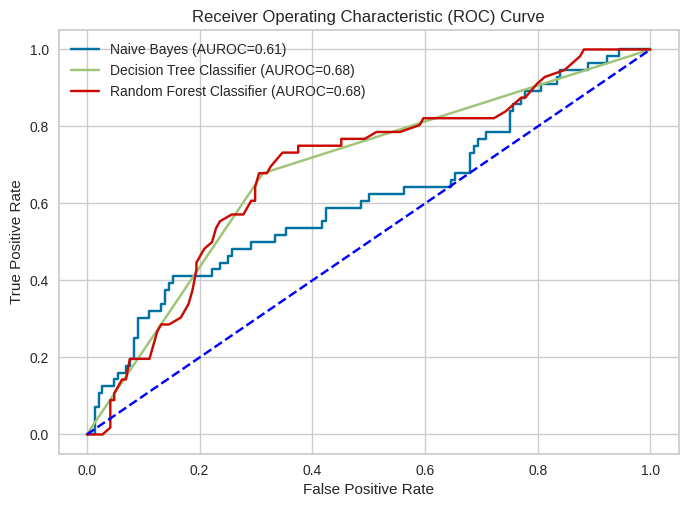

In [132]:
plt.plot(nb_fpr,nb_tpr, label="Naive Bayes (AUROC=%0.2f)"%nb_auc)
plt.plot(dt_fpr,dt_tpr, label="Decision Tree Classifier (AUROC=%0.2f)"%dt_auc)
plt.plot(rf_fpr,rf_tpr, label="Random Forest Classifier (AUROC=%0.2f)"%rf_auc)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()

In [ ]:
# Hyperparameter Tuning in different classifiers

In [133]:
from sklearn.model_selection import GridSearchCV

In [134]:
classifiers = [
    (RandomForestClassifier(), {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}),
    (GradientBoostingClassifier(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.01, 0.001]}),
    (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7], 'p': [1, 2]}),
    (SVC(), {'C': [1, 10, 100], 'kernel': ['linear', 'rbf']})
]

In [137]:
best_models = {}

for clf, param_grid in classifiers:
    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(x_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    best_models[str(best_model)] = accuracy

In [138]:
for model, accuracy in best_models.items():
    print(f"{model} - Accuracy: {accuracy:.4f}")

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False) - Accuracy: 0.7200
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=200, n_iter_no_change=None,
                           random_state=